## Make Sure we have access to GPU

In [1]:
!nvidia-smi

Sat Jun  1 11:28:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.154.05             Driver Version: 535.154.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:A1:00.0 Off |                  Off |
|  0%   28C    P8              18W / 450W |      1MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Set the path

In [7]:
!python --version

Python 3.10.12


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/workspace


# Install Yolov10 and Roboflow

In [8]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
remote: Enumerating objects: 20190, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 20190 (delta 179), reused 221 (delta 141), pack-reused 19921
Receiving objects: 100% (20190/20190), 11.33 MiB | 13.12 MiB/s, done.
Resolving deltas: 100% (14158/14158), done.
Updating files: 100% (578/578), done.


In [9]:
cd yolov10

/workspace/yolov10


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [10]:
pwd

'/workspace/yolov10'

In [11]:
!pip install .

Processing /workspace/yolov10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=729285 sha256=efe1db338971d093c698851eed4bbb79da437bb4237a51c41643e1752aaa4d31
  Stored in directory: /tmp/pip-ephem-wheel-cache-984vpzih/wheels/59/ef/ec/3471ef86f63d242115af1b3b15e686ce93285cd21e0f5de6da
Successfully built ultralytics
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


### Download the pretrained weights

In [13]:
!mkdir -p {HOME}/yolov10/weights

In [14]:
!wget -P {HOME}/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt

In [15]:
!ls -lh {HOME}/yolov10/weights

total 64M
-rw-rw-rw- 1 root root 64M May 26 15:54 yolov10m.pt


### Install supervision and roboflow

In [16]:
!pip install -q supervision roboflow


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


# Download the dataset

'''
    https://universe.roboflow.com/university-2xdiy/pcb-defects-chi1b/dataset/3#
'''

In [18]:
!mkdir -p {HOME}/data

In [22]:
pwd

'/workspace/data'

In [23]:
from roboflow import Roboflow

rf = Roboflow(api_key="")

project = rf.workspace("university-2xdiy").project("pcb-defects-chi1b")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to PCB-Defects--3 in yolov8:: 100%|██████████| 27120/27120 [01:05<00:00, 413.47it/s]


# Train the Model.

'''
    Since yolov10 is part of ultralytics package.
    Lets use python SDK.
'''

In [43]:
# This is needed to run ultralytics
# !pip install huggingface huggingface_hub

In [45]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Setup complete ✅ (128 CPUs, 503.7 GB RAM, 0.8/20.0 GB disk)


### Start training

In [51]:
from ultralytics import YOLO

In [52]:
# load a pretrained model
weight = f'{HOME}/yolov10/weights/yolov10m.pt'
# print(weight)

model = YOLO(weight)

In [54]:
data = f'{HOME}/data/PCB-Defects--3/data.yaml'
results = model.train(data = data,
                     epochs = 50,
                     batch = 32,
                     imgsz = 600,
                     plots = True)

New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=/workspace/yolov10/weights/yolov10m.pt, data=/workspace/data/PCB-Defects--3/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=600, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=F

100%|██████████| 755k/755k [00:00<00:00, 145MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

 17                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  2    831744  ultralytics.nn.modules.block.C2fCIB          [576, 384, 2, True]           
 20                  -1  1    152448  ultralytics.nn.modules.block.SCDown          [384, 384, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  2   1911168  ultralytics.nn.modules.block.C2fCIB          [960, 576, 2, True]           
 23        [16, 19, 22]  1   2287924  ultralytics.nn.modules.head.v10Detect        [6, [192, 384, 576]]          
YOLOv10m summary: 498 layers, 16491076 parameters, 16491060 gradients, 64.0 GFLOPs

Transferred 787/799 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mix

100%|██████████| 6.23M/6.23M [00:01<00:00, 3.51MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]


train: Scanning /workspace/data/PCB-Defects--3/train/labels... 11166 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11166/11166 [00:15<00:00, 724.32it/s]


train: New cache created: /workspace/data/PCB-Defects--3/train/labels.cache


val: Scanning /workspace/data/PCB-Defects--3/valid/labels... 1592 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1592/1592 [00:02<00:00, 743.65it/s]


val: New cache created: /workspace/data/PCB-Defects--3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
Image sizes 608 train, 608 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/50      16.4G      2.019      2.092      1.272      2.094      3.306       1.21         66        608: 100%|██████████| 349/349 [01:20<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.09it/s]

                   all       1592       3266      0.703      0.691      0.772      0.327



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/50      16.5G      1.824       1.05      1.162      1.956      1.082      1.142         72        608: 100%|██████████| 349/349 [01:15<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]

                   all       1592       3266      0.906      0.899       0.94       0.44



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/50      16.5G       1.78      0.961      1.139      1.915     0.9533      1.126         73        608: 100%|██████████| 349/349 [01:13<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.35it/s]


                   all       1592       3266      0.873      0.811      0.883      0.396

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/50      16.5G      1.742     0.9097      1.119      1.883     0.8611      1.111         50        608: 100%|██████████| 349/349 [01:12<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.31it/s]


                   all       1592       3266      0.955      0.913       0.96      0.473

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/50      16.5G      1.702     0.8525        1.1      1.831     0.7919      1.093         81        608: 100%|██████████| 349/349 [01:13<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]


                   all       1592       3266       0.94      0.918      0.959      0.474

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/50      16.5G      1.666     0.8124      1.086      1.795     0.7516      1.081         90        608: 100%|██████████| 349/349 [01:14<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


                   all       1592       3266      0.941      0.891      0.953      0.475

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/50      16.5G      1.646     0.7831      1.077      1.764     0.7063       1.07         72        608: 100%|██████████| 349/349 [01:13<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]

                   all       1592       3266      0.949      0.936      0.966      0.482



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/50      16.5G      1.611     0.7467      1.062      1.721     0.6691      1.057        109        608: 100%|██████████| 349/349 [01:13<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.18it/s]


                   all       1592       3266      0.967      0.955      0.978      0.509

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/50      16.5G      1.596     0.7353      1.059      1.706     0.6643      1.052         98        608: 100%|██████████| 349/349 [01:12<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.37it/s]

                   all       1592       3266      0.958      0.952      0.975      0.504



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/50      16.5G      1.574      0.716      1.054      1.682     0.6436      1.046         84        608: 100%|██████████| 349/349 [01:12<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


                   all       1592       3266      0.967      0.965      0.979      0.522

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/50      16.5G      1.544     0.6938      1.044      1.652     0.6273      1.039         76        608: 100%|██████████| 349/349 [01:13<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]


                   all       1592       3266      0.969      0.957      0.982      0.526

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/50      16.5G      1.538      0.682      1.041      1.647      0.606      1.035         53        608: 100%|██████████| 349/349 [01:12<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.35it/s]

                   all       1592       3266      0.957      0.969      0.983      0.531



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/50      16.5G      1.512     0.6677      1.037      1.612     0.6054      1.032         96        608: 100%|██████████| 349/349 [01:12<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]


                   all       1592       3266      0.966      0.966      0.985      0.534

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/50      16.5G      1.485     0.6559      1.024      1.585     0.5886      1.018         89        608: 100%|██████████| 349/349 [01:14<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.34it/s]

                   all       1592       3266      0.961      0.967      0.982      0.525



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/50      16.5G      1.474     0.6476      1.023      1.574     0.5736      1.018         67        608: 100%|██████████| 349/349 [01:12<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.17it/s]


                   all       1592       3266      0.975      0.967      0.985      0.547

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/50      16.5G      1.456     0.6347      1.018      1.556     0.5647      1.012         74        608: 100%|██████████| 349/349 [01:13<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.38it/s]

                   all       1592       3266      0.971      0.976      0.986      0.553



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/50      16.5G      1.432      0.623      1.013       1.53     0.5473      1.009         80        608: 100%|██████████| 349/349 [01:12<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]


                   all       1592       3266       0.97      0.968      0.981      0.553

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/50      16.5G      1.418     0.6143      1.007       1.52     0.5487      1.003         65        608: 100%|██████████| 349/349 [01:12<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]


                   all       1592       3266      0.969      0.977      0.983       0.55

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/50      16.5G      1.413     0.6047      1.004      1.509     0.5362     0.9982         99        608: 100%|██████████| 349/349 [01:12<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


                   all       1592       3266       0.97       0.97      0.984      0.552

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/50      16.5G      1.387     0.5986     0.9961      1.486     0.5333     0.9921         76        608: 100%|██████████| 349/349 [01:14<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]


                   all       1592       3266      0.968      0.973      0.984      0.558

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      21/50      16.5G      1.367     0.5875     0.9912      1.463     0.5248     0.9872         65        608: 100%|██████████| 349/349 [01:13<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]


                   all       1592       3266      0.976      0.973      0.985      0.564

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      22/50      16.5G      1.353      0.583     0.9884      1.449     0.5144     0.9862         59        608: 100%|██████████| 349/349 [01:15<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.14it/s]


                   all       1592       3266      0.976      0.983      0.985      0.568

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      23/50      16.5G      1.329     0.5727     0.9832      1.424       0.51     0.9804         74        608: 100%|██████████| 349/349 [01:12<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.34it/s]

                   all       1592       3266      0.971      0.981      0.985      0.567



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      24/50      16.6G       1.31     0.5673     0.9757      1.404     0.4975     0.9726         69        608: 100%|██████████| 349/349 [01:12<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.34it/s]

                   all       1592       3266      0.975      0.978      0.987      0.567



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      25/50      16.5G      1.289     0.5553     0.9709      1.384     0.4917     0.9683         71        608: 100%|██████████| 349/349 [01:12<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.25it/s]


                   all       1592       3266      0.977      0.975      0.987      0.572

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      26/50      16.5G      1.281     0.5525     0.9678      1.379     0.4955     0.9657         65        608: 100%|██████████| 349/349 [01:12<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.34it/s]


                   all       1592       3266      0.973      0.985      0.986      0.578

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      27/50      16.5G      1.265     0.5482     0.9648      1.362     0.4854     0.9616         67        608: 100%|██████████| 349/349 [01:12<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


                   all       1592       3266      0.976      0.985      0.988      0.584

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      28/50      16.5G      1.241     0.5385     0.9585      1.335     0.4856     0.9552         67        608: 100%|██████████| 349/349 [01:12<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]


                   all       1592       3266      0.972      0.984      0.988      0.587

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      29/50      16.5G      1.227     0.5263      0.955      1.319     0.4634      0.952         81        608: 100%|██████████| 349/349 [01:16<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.25it/s]


                   all       1592       3266      0.977      0.981      0.989      0.585

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      30/50      16.5G      1.213     0.5235     0.9519      1.306     0.4638     0.9492         71        608: 100%|██████████| 349/349 [01:11<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.32it/s]


                   all       1592       3266       0.98      0.981      0.988      0.588

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      31/50      16.5G      1.184     0.5143     0.9431       1.28     0.4559     0.9405         88        608: 100%|██████████| 349/349 [01:13<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


                   all       1592       3266      0.979      0.981      0.988      0.592

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      32/50      16.5G      1.174     0.5086     0.9432      1.271     0.4489     0.9413         77        608: 100%|██████████| 349/349 [01:12<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.35it/s]


                   all       1592       3266      0.975      0.985      0.985      0.594

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      33/50      16.5G      1.155     0.4999     0.9367      1.248       0.45     0.9358         75        608: 100%|██████████| 349/349 [01:12<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.36it/s]

                   all       1592       3266      0.977      0.985      0.989      0.596



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      34/50      16.5G      1.141      0.494     0.9366      1.235     0.4385     0.9359         95        608: 100%|██████████| 349/349 [01:12<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]


                   all       1592       3266      0.977      0.986      0.988      0.603

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      35/50      16.5G      1.124     0.4909     0.9333      1.221     0.4417     0.9316         89        608: 100%|██████████| 349/349 [01:11<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.36it/s]

                   all       1592       3266      0.979      0.986      0.989      0.606



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      36/50      16.5G      1.106     0.4811     0.9254      1.202     0.4311     0.9247         72        608: 100%|██████████| 349/349 [01:11<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.32it/s]


                   all       1592       3266      0.977      0.988      0.989      0.604

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      37/50      16.5G       1.09     0.4754       0.92      1.185     0.4205     0.9191         87        608: 100%|██████████| 349/349 [01:12<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.37it/s]

                   all       1592       3266      0.978      0.986      0.988      0.607



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      38/50      16.5G      1.075     0.4723     0.9176       1.17      0.423     0.9169         81        608: 100%|██████████| 349/349 [01:14<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]


                   all       1592       3266      0.979      0.985      0.988      0.612

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      39/50      16.5G      1.054     0.4599     0.9177      1.147     0.4088     0.9165         88        608: 100%|██████████| 349/349 [01:14<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]

                   all       1592       3266      0.979      0.983      0.988      0.613



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      40/50      16.5G      1.044     0.4578     0.9129      1.138     0.4116     0.9121         86        608: 100%|██████████| 349/349 [01:12<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


                   all       1592       3266      0.978      0.987      0.989      0.615
Closing dataloader mosaic

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      41/50      16.6G      1.032     0.4286     0.9346      1.095     0.3514     0.9336         52        608: 100%|██████████| 349/349 [01:14<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


                   all       1592       3266      0.979      0.984      0.988      0.617

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      42/50      16.6G      1.002     0.4154     0.9227      1.066     0.3354     0.9219         59        608: 100%|██████████| 349/349 [01:12<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.32it/s]


                   all       1592       3266       0.98      0.983      0.988      0.616

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      43/50      16.6G     0.9826     0.4113     0.9214      1.046     0.3341     0.9213         56        608: 100%|██████████| 349/349 [01:12<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.36it/s]

                   all       1592       3266      0.981      0.984      0.989      0.619



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      44/50      16.6G      0.965     0.4054     0.9173      1.028     0.3316     0.9168         50        608: 100%|██████████| 349/349 [01:13<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.27it/s]


                   all       1592       3266      0.981      0.985      0.989      0.621

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      45/50      16.6G     0.9436      0.398     0.9097      1.009      0.325     0.9094         51        608: 100%|██████████| 349/349 [01:12<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.35it/s]


                   all       1592       3266      0.983      0.984      0.989      0.624

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      46/50      16.6G     0.9309     0.3953     0.9063     0.9951     0.3248     0.9078         66        608: 100%|██████████| 349/349 [01:14<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]


                   all       1592       3266      0.979      0.986      0.989      0.625

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      47/50      16.6G     0.9106     0.3862     0.9022     0.9711     0.3097     0.9018         51        608: 100%|██████████| 349/349 [01:15<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.19it/s]


                   all       1592       3266      0.981      0.986      0.989      0.625

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      48/50      16.5G     0.8955     0.3836     0.8989     0.9596     0.3143     0.8992         50        608: 100%|██████████| 349/349 [01:14<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]


                   all       1592       3266      0.979      0.986      0.988      0.625

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      49/50      16.6G     0.8788     0.3774     0.8945     0.9417     0.3054     0.8943         60        608: 100%|██████████| 349/349 [01:14<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.19it/s]


                   all       1592       3266      0.979      0.984      0.988      0.624

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      50/50      16.6G     0.8705     0.3765     0.8923     0.9365      0.312     0.8925         47        608: 100%|██████████| 349/349 [01:14<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]


                   all       1592       3266       0.98      0.987      0.989      0.626

50 epochs completed in 1.153 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLOv10m summary (fused): 369 layers, 16457332 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.71it/s]


                   all       1592       3266      0.979      0.987      0.989      0.626
          missing_hole       1592        554      0.987      0.993      0.992      0.672
            mouse_bite       1592        589      0.972      0.995      0.989      0.631
          open_circuit       1592        532      0.981      0.985      0.989      0.607
                 short       1592        477      0.971      0.972      0.982      0.605
                  spur       1592        592      0.984      0.993       0.99      0.609
       spurious_copper       1592        522      0.981      0.985      0.991      0.629
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/detect/train


In [55]:
pwd

'/workspace'

In [56]:
cd {HOME}/runs/detect/train

/workspace/runs/detect/train


using dhist requires you to install the `pickleshare` library.


In [57]:
!ls

F1_curve.png			 labels_correlogram.jpg  train_batch2.jpg
PR_curve.png			 results.csv		 val_batch0_labels.jpg
P_curve.png			 results.png		 val_batch0_pred.jpg
R_curve.png			 train_batch0.jpg	 val_batch1_labels.jpg
args.yaml			 train_batch1.jpg	 val_batch1_pred.jpg
confusion_matrix.png		 train_batch13960.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch13961.jpg	 val_batch2_pred.jpg
labels.jpg			 train_batch13962.jpg	 weights


In [58]:
%cd {HOME}

/workspace


### https://saturncloud.io/blog/how-to-show-images-in-jupyter-notebook/

In [62]:
!pip install Pillow


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [70]:
from PIL import Image
from IPython.display import display

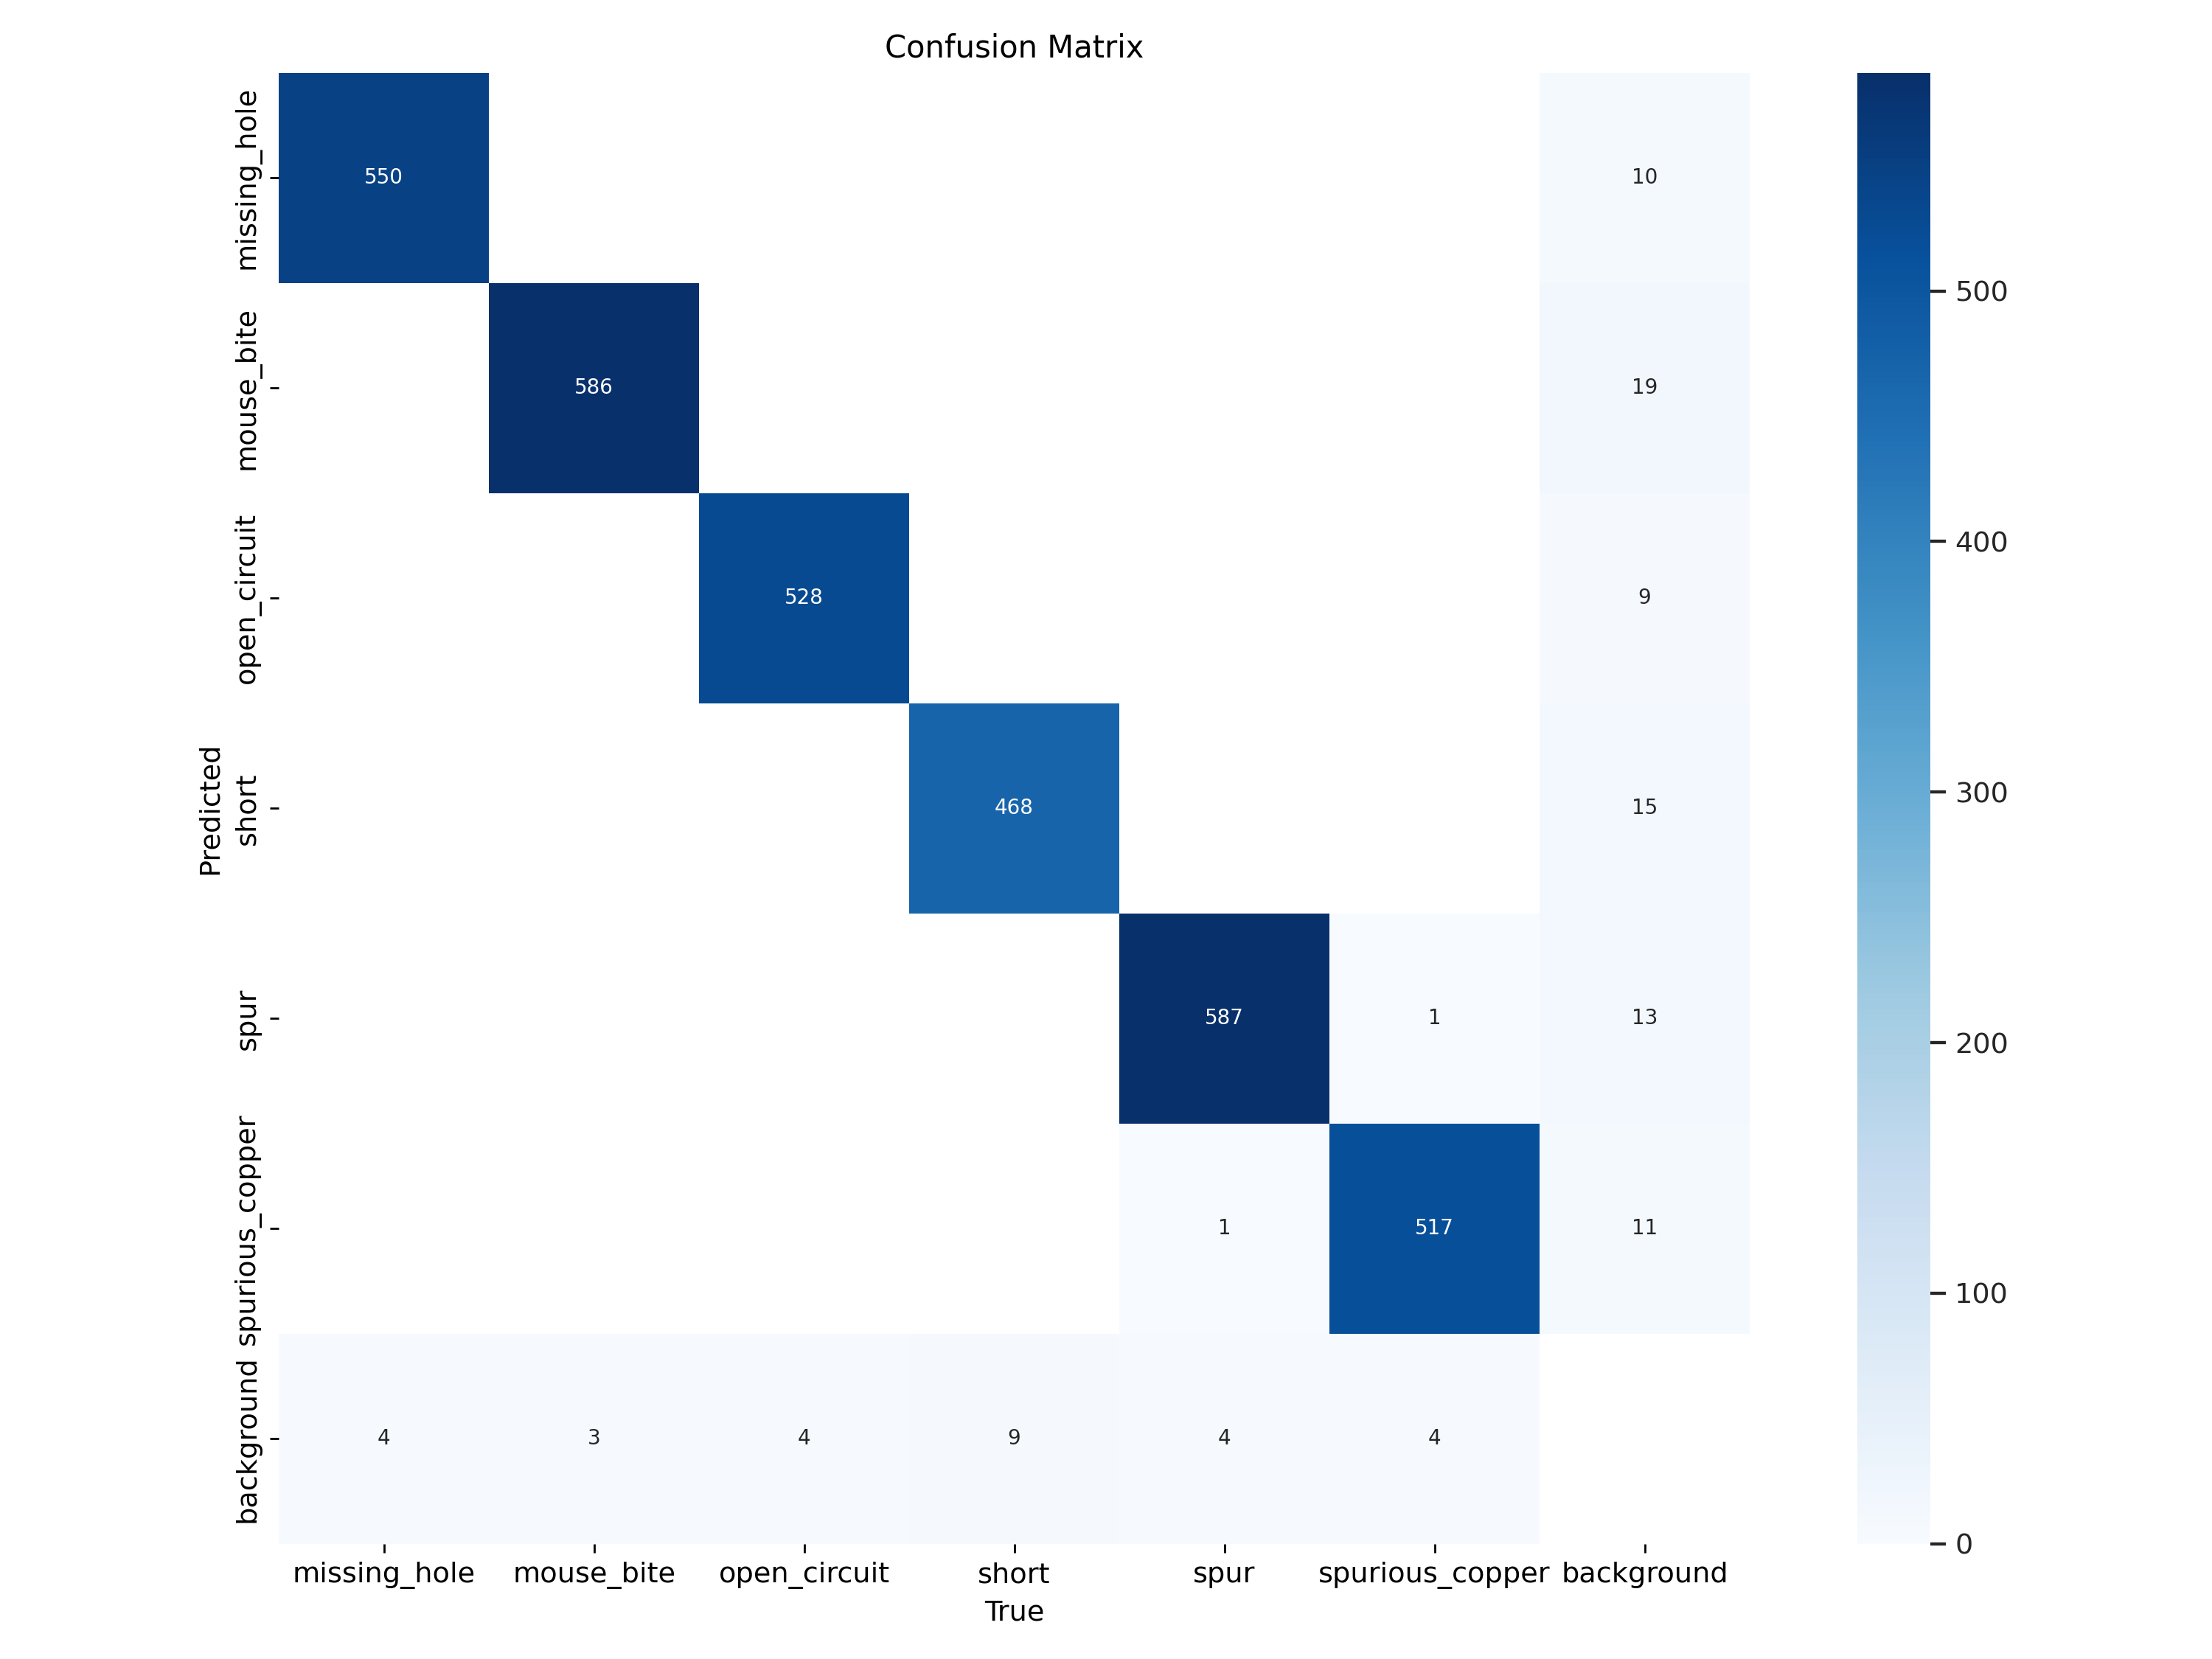

In [71]:

img = Image.open(f'{HOME}/runs/detect/train/confusion_matrix.png')
display(img)

# Analysis of Confusion Matrix

Interpretation

missing_hole:

True Positives (Correctly Predicted): 550 <br>
False Negatives (Actual missing_hole but predicted as another class): 10 (background), 4 (spur), 3 (spurious_copper) <br>
Total: 550 + 10 + 4 + 3 = 567


mouse_bite:

True Positives: 586 <br>
False Negatives: 19 (background), 3 (spur)<br>
Total: 586 + 19 + 3 = 608

open_circuit:

True Positives: 528<br>
False Negatives: 9 (background), 4 (spur), 4 (spurious_copper)<br>
Total: 528 + 9 + 4 + 4 = 545

short:

True Positives: 468<br>
False Negatives: 15 (background), 9 (spur)<br>
Total: 468 + 15 + 9 = 492

spur:

True Positives: 587<br>
False Negatives: 1 (spurious_copper), 1 (background), 13 (spurious_copper)<br>
Total: 587 + 1 + 1 + 13 = 602

spurious_copper:

True Positives: 517<br>
False Negatives: 11 (background), 4 (spur), 1 (spur)<br>
Total: 517 + 11 + 4 + 1 = 533


background:

True Positives: Not shown explicitly but can be inferred from total and other classes.<br>
Total: Aggregate of all background-related values.<br>

Insights from the Matrix

Diagonal Dominance: Most of the values are concentrated along the diagonal, indicating that the model is correctly classifying a high number of instances.<br>
Low Off-Diagonal Values: The numbers in off-diagonal positions are relatively low, indicating fewer misclassifications.
Class-wise Performance:<br>
mouse_bite and spur have very high true positive counts, suggesting the model is very good at identifying these classes.<br>
missing_hole and short also have high correct prediction counts but with slightly more misclassifications compared to mouse_bite and spur.<br>
open_circuit and spurious_copper show slightly more spread in their predictions, indicating a few more misclassifications.<br>

Conclusion

The confusion matrix suggests that the model is performing quite well overall, with high correct prediction counts for all classes and relatively low misclassification counts.

If there are specific areas where misclassification needs to be addressed, focus on improving the prediction accuracy for those particular pairs of classes (e.g., reducing the confusion between spurious_copper and spur).



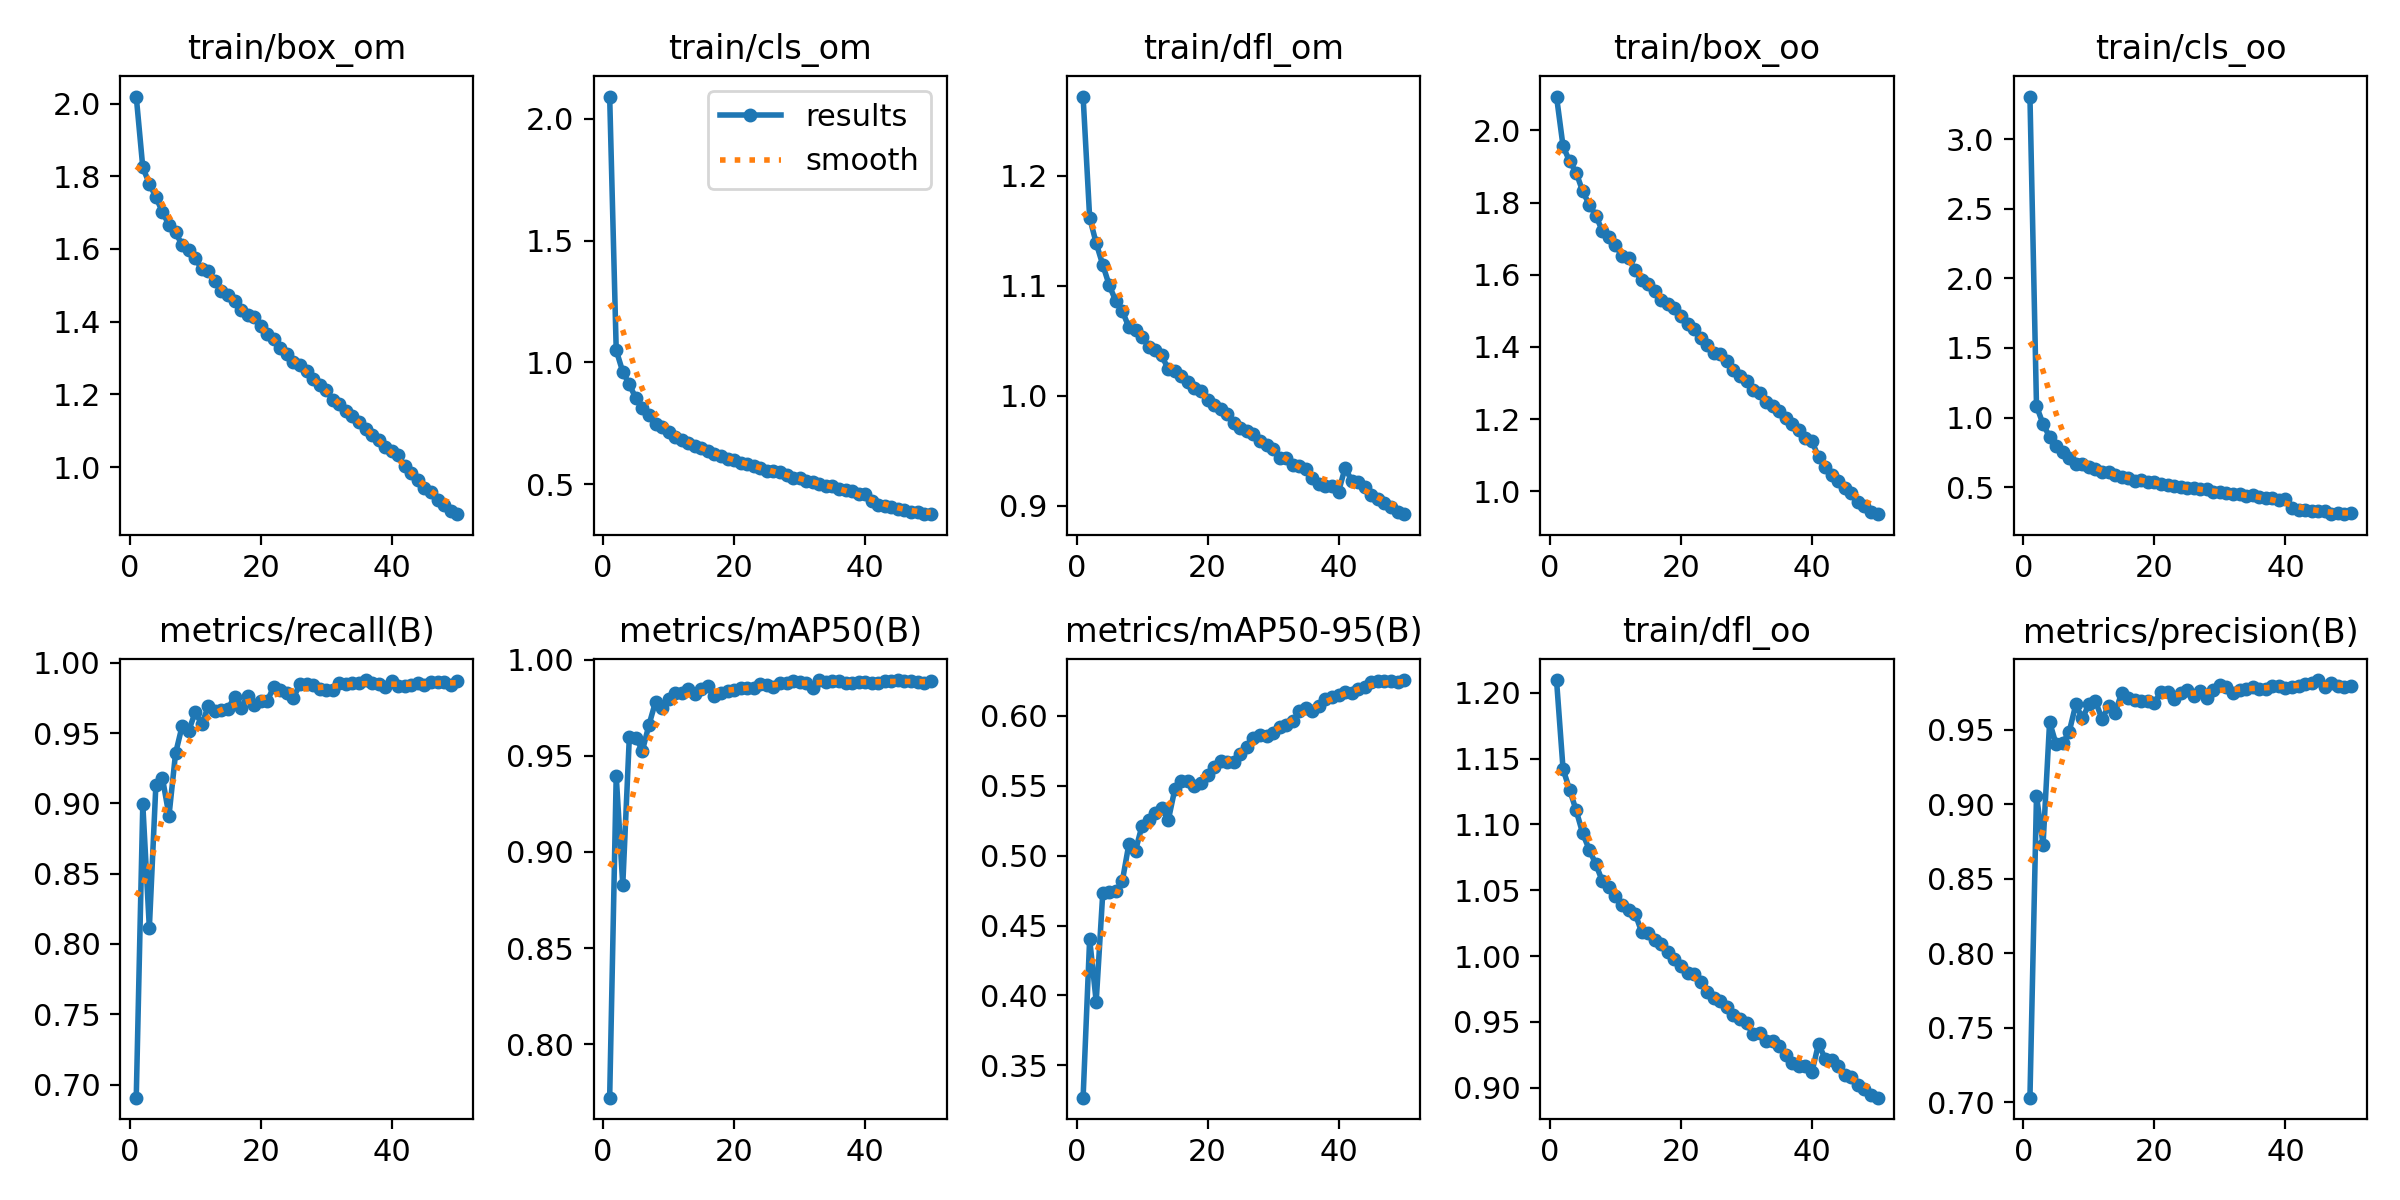

In [72]:
img = Image.open(f'{HOME}/runs/detect/train/results.png')
display(img)

# Analysing the Log

Top Row: Losses During Training
train/box_om:

This plot shows the loss associated with the bounding box regression during training.<br>
Observation: The loss starts at around 2.0 and steadily decreases to around 1.0 over the training iterations.<br>
Interpretation: A consistent decrease in loss indicates that the model is learning to predict bounding boxes more accurately over time.

train/cls_om:

This plot shows the loss associated with the classification during training.<br>
Observation: The loss starts high (around 2.0) and drops significantly to around 0.5.<br>
Interpretation: A sharp decline in the classification loss suggests effective learning in distinguishing different classes.

train/dfl_om:

This plot represents the distribution focal loss during training.<br>
Observation: The loss decreases from 1.2 to about 0.9.<br>
Interpretation: The reduction in this loss indicates improved localization of objects within bounding boxes.

train/box_oo:

Similar to train/box_om, but possibly for another subset or variation in the training process.<br>
Observation: The trend is similar to train/box_om, with loss decreasing from 2.0 to around 1.0.<br>
Interpretation: Consistent decrease indicates the model's robustness in bounding box prediction across different subsets.

train/cls_oo:

Similar to train/cls_om, but for another subset or variation in training.<br>
Observation: The loss drops steeply from about 3.0 to 0.5.<br>
Interpretation: The model is effectively learning to classify objects correctly across different training conditions.

Bottom Row: Performance Metrics

metrics/recall(B):

This plot shows the recall metric over training iterations.<br>
Observation: Recall starts at around 0.70, quickly rises to around 0.85, and then gradually improves to nearly 1.0.<br>
Interpretation: High recall indicates that the model is successfully identifying most of the relevant objects in the images.

metrics/mAP50(B):

This plot shows the mean Average Precision at IoU threshold 0.5.<br>
Observation: mAP50 starts around 0.80 and improves steadily to about 0.95.<br>
Interpretation: High mAP50 indicates good overall detection performance at a standard IoU threshold, meaning the model's predictions are generally accurate.

metrics/mAP50-95(B):

This plot shows the mean Average Precision across multiple IoU thresholds from 0.50 to 0.95.<br>
Observation: mAP50-95 starts at around 0.35 and increases steadily to about 0.60.<br>
Interpretation: This metric is stricter than mAP50, and its improvement indicates the model's robustness and precision across various IoU thresholds.

train/dfl_oo:

Similar to train/dfl_om, but for another subset or variation in training.<br>
Observation: The loss decreases from 1.2 to about 0.9.<br>
Interpretation: The consistent trend reaffirms the model's improving ability in localization tasks.

metrics/precision(B):

This plot shows the precision metric over training iterations.<br>
Observation: Precision starts at around 0.70, quickly rises to about 0.85, and then improves to nearly 0.95.<br>
Interpretation: High precision indicates that most of the detected objects are correctly classified, with few false positives.


Summary

Loss Metrics: The losses (box, cls, dfl) consistently decrease over time, indicating that the model is learning effectively. The smoothness of the curves suggests stable training without significant oscillations, which is a good sign of appropriate learning rates and model convergence.

Performance Metrics: Recall, mAP50, mAP50-95, and precision all show significant improvements. High and steadily improving values in these metrics suggest that the model is becoming more accurate and reliable in its predictions.

Overall, these graphs indicate a well-performing training process where the model is improving consistently across both loss and performance metrics. The smooth and steady decrease in loss, combined with the increase in recall, precision, and mAP, suggests that the training is progressing effectively and the model is learning the task well.